# IPython 与 RQAlpha

## 加载 RQAlpha magic

In [3]:
%load_ext rqalpha

## 查看 RQAlpha magic 帮助

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [4]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --dividend-reinvestment         enable dividend r

## 使用 %%rqalpha 进行回测

2016-03-01 INFO positions hs300: 0, zz500: 0, gz: 607
2016-03-08 INFO positions hs300: 0, zz500: 17, gz: 0
2016-03-09 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-10 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-11 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-14 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-15 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-16 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-17 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-18 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-21 INFO positions hs300: 31, zz500: 0, gz: 0
2016-03-22 INFO positions hs300: 31, zz500: 0, gz: 0
2016-05-05 INFO positions hs300: 0, zz500: 0, gz: 634
2016-08-04 INFO positions hs300: 0, zz500: 0, gz: 606
2016-08-05 INFO positions hs300: 29, zz500: 0, gz: 0
2016-08-12 INFO positions hs300: 0, zz500: 0, gz: 609
2016-08-15 INFO positions hs300: 29, zz500: 0, gz: 0
2016-08-16 INFO positions hs300: 29, zz500: 0, gz: 0
2016-08-17 INFO positions hs300: 29, zz500

2018-02-02 INFO positions hs300: 23, zz500: 0, gz: 0
2018-02-05 INFO positions hs300: 23, zz500: 0, gz: 0
[2018-02-11 13:05:52.716053] WARN: system_log: Missing Chinese fonts. Fallback to English.


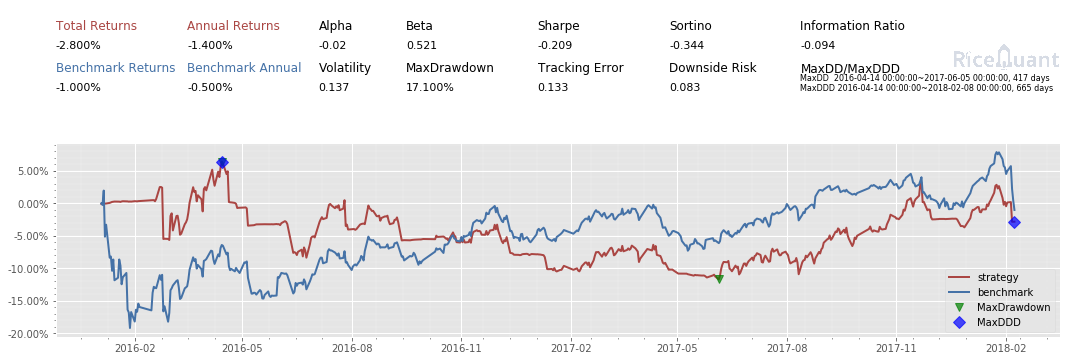

In [5]:
%%rqalpha -s 20160101 -e 20180208 -p -bm 000001.XSHG --account stock 100000

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果。

另外 rqalpha 的 mod 的输出会自动存储在 `results` 变量中。

In [6]:
results.keys()

dict_keys(['sys_analyser'])

In [7]:
report.keys()

dict_keys(['stock_positions', 'benchmark_portfolio', 'summary', 'stock_account', 'portfolio', 'trades'])

In [8]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2016-01-04 15:00:00,79.928288,1518325547,154.66,646,000012.XSHG,1518325545,None,BUY,国债指数,0,2016-01-04 15:00:00,79.928288
2016-02-18 15:00:00,80.372736,1518325548,155.52,646,000012.XSHG,1518325546,None,SELL,国债指数,0,2016-02-18 15:00:00,80.372736
2016-02-18 15:00:00,76.251264,1518325549,5957.13,16,000905.XSHG,1518325547,None,BUY,中证500(沪),0,2016-02-18 15:00:00,76.251264
2016-02-22 15:00:00,78.127616,1518325550,6103.72,16,000905.XSHG,1518325548,None,SELL,中证500(沪),0,2016-02-22 15:00:00,78.127616
2016-02-22 15:00:00,82.058680,1518325551,155.65,659,000012.XSHG,1518325549,None,BUY,国债指数,0,2016-02-22 15:00:00,82.058680


In [9]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2016-01-04,9.712,99910.36,1.000,99920.072,0.999201,100000.0
2016-01-05,9.712,99936.20,0.999,99945.912,0.999459,100000.0
2016-01-06,9.712,99955.58,0.999,99965.292,0.999653,100000.0
2016-01-07,9.712,99942.66,1.000,99952.372,0.999524,100000.0
2016-01-08,9.712,99962.04,1.000,99971.752,0.999718,100000.0


In [10]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2016-01-04,154.66,154.66,99910.36,000012.XSHG,646,国债指数
2016-01-05,154.66,154.70,99936.20,000012.XSHG,646,国债指数
2016-01-06,154.66,154.73,99955.58,000012.XSHG,646,国债指数
2016-01-07,154.66,154.71,99942.66,000012.XSHG,646,国债指数
2016-01-08,154.66,154.74,99962.04,000012.XSHG,646,国债指数


## 使用 run_func 运行回测

[2018-02-11 13:06:57.417233] WARN: system_log: Missing Chinese fonts. Fallback to English.


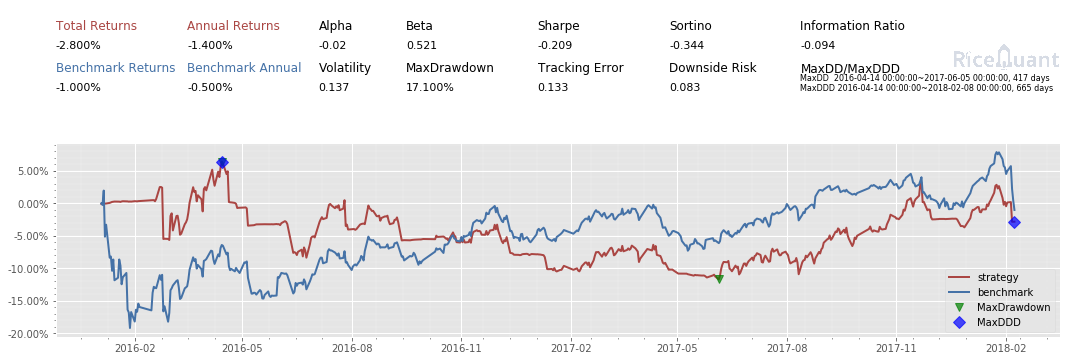

In [11]:
config = {
  "base": {
    "start_date": "2016-01-01",
    "end_date": "2018-02-08",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func


def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        
        
results = run_func(init=init, handle_bar=handle_bar, config=config)

In [12]:
report = results["sys_analyser"]

In [13]:
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2016-01-04 15:00:00,79.928288,1518325690,154.66,646,000012.XSHG,1518325688,None,BUY,国债指数,0,2016-01-04 15:00:00,79.928288
2016-02-18 15:00:00,80.372736,1518325691,155.52,646,000012.XSHG,1518325689,None,SELL,国债指数,0,2016-02-18 15:00:00,80.372736
2016-02-18 15:00:00,76.251264,1518325692,5957.13,16,000905.XSHG,1518325690,None,BUY,中证500(沪),0,2016-02-18 15:00:00,76.251264
2016-02-22 15:00:00,78.127616,1518325693,6103.72,16,000905.XSHG,1518325691,None,SELL,中证500(沪),0,2016-02-22 15:00:00,78.127616
2016-02-22 15:00:00,82.058680,1518325694,155.65,659,000012.XSHG,1518325692,None,BUY,国债指数,0,2016-02-22 15:00:00,82.058680
